# Homework 02

Dataset
In this homework, we will use the California Housing Prices from Kaggle.

## Load Dataset

In [126]:
import wget
wget.download('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

'housing (5).csv'

In [127]:
import pandas as pd
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## EDA

In [128]:
df.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [129]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [130]:
df[["median_house_value"]].describe()

,median_house_value
count,20640.000000
mean,206855.816909
std,115395.615874
min,14999.000000
25%,119600.000000
50%,179700.000000
75%,264725.000000
max,500001.000000


c:\Users\evren\anaconda3\envs\ml-zoomcamp\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


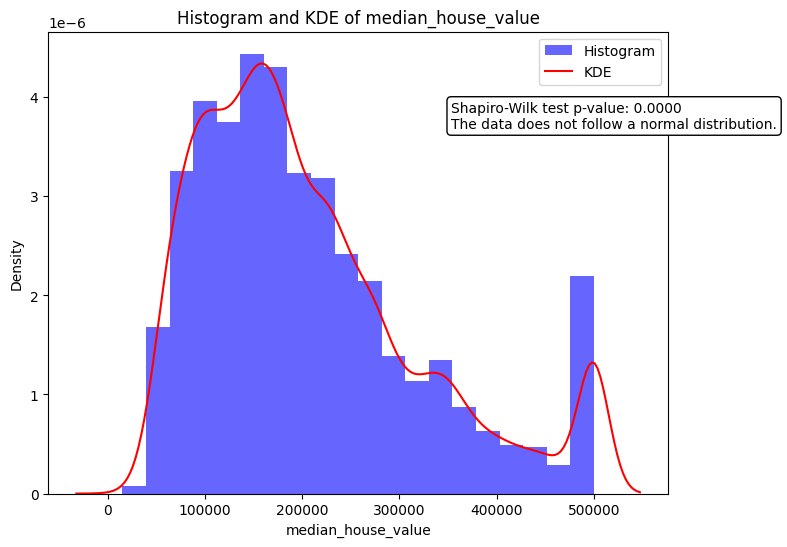

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro


column_name = "median_house_value"

# Create a figure and axis for subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the column as a histogram
ax.hist(df[column_name], bins=20, density=True, alpha=0.6, color='b', label='Histogram')

# Perform Shapiro-Wilk test for normality
stat, p_value = shapiro(df[column_name])

# Check the p-value to determine if the data is normally distributed
if p_value > 0.05:
    ax.text(0.65, 0.85, 'Shapiro-Wilk test p-value: {:.4f}\nThe data follows a normal distribution.'.format(p_value),
            transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white'))
else:
    ax.text(0.65, 0.85, 'Shapiro-Wilk test p-value: {:.4f}\nThe data does not follow a normal distribution.'.format(p_value),
            transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white'))

# Plot the KDE
sns.kdeplot(df[column_name], ax=ax, color='r', label='KDE')

# Set labels and title
ax.set_xlabel(column_name)
ax.set_ylabel('Density')
ax.set_title('Histogram and KDE of ' + column_name)

# Add a legend
ax.legend()

### Question 1
There's one feature with missing values. What is it?

In [132]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [133]:
df[['ocean_proximity']].value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

In [134]:
filtered_df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])][[ 'latitude',
                                                                        'longitude',
                                                                        'housing_median_age',
                                                                        'total_rooms',
                                                                        'total_bedrooms',
                                                                        'population',
                                                                        'households',
                                                                        'median_income',
                                                                        'median_house_value']]
filtered_df.head(5)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [135]:
filtered_df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2
What's the median (50% percentile) for variable 'population'?

In [136]:
filtered_df.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,35.467307,-119.217442,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,2.066387,1.780380,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,32.610000,-124.140000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,33.940000,-121.070000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,34.160000,-118.370000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,37.340000,-117.990000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [137]:
shuffled_df.count()

latitude              15687
longitude             15687
housing_median_age    15687
total_rooms           15687
total_bedrooms        15530
population            15687
households            15687
median_income         15687
median_house_value    15687
dtype: int64

### Shuffle the filtered DataFrame with seed 42


In [138]:
# Shuffle the filtered DataFrame with seed 42
shuffled_df = filtered_df.sample(frac=1, random_state=42)
shuffled_df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0
...,...,...,...,...,...,...,...,...,...
6651,34.15,-118.14,41.0,1256.0,407.0,855.0,383.0,1.9923,500001.0
17810,37.40,-121.86,19.0,4043.0,764.0,2196.0,708.0,6.1504,268400.0
6850,34.07,-118.15,52.0,1983.0,344.0,887.0,331.0,3.2875,234400.0
2161,36.78,-119.81,37.0,1965.0,364.0,796.0,335.0,3.6250,83400.0


### Split the data into train, validation, and test sets (60%/20%/20%)


In [139]:
from sklearn.model_selection import train_test_split

# Split the data into train, validation, and test sets (60%/20%/20%)
train_data, temp_data = train_test_split(filtered_df, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

print("Train set shape:", train_data.shape, round((train_data.shape[0]/filtered_df.shape[0])*100), "%")
print("Validation set shape:", val_data.shape, round((val_data.shape[0]/filtered_df.shape[0])*100), "%")
print("Test set shape:", test_data.shape, round((test_data.shape[0]/filtered_df.shape[0])*100), "%")

Train set shape: (9412, 9) 60 %
Validation set shape: (3137, 9) 20 %
Test set shape: (3138, 9) 20 %


### Apply log transformation to the 'median_house_value' variable using np.log1p()

In [140]:
import numpy as np
# Apply log transformation to the 'median_house_value' variable using np.log1p()
train_data['median_house_value_log'] = np.log1p(train_data['median_house_value'])
val_data['median_house_value_log'] = np.log1p(val_data['median_house_value'])
test_data['median_house_value_log'] = np.log1p(test_data['median_house_value'])

In [141]:
train_data.isnull().sum()

latitude                   0
longitude                  0
housing_median_age         0
total_rooms                0
total_bedrooms            95
population                 0
households                 0
median_income              0
median_house_value         0
median_house_value_log     0
dtype: int64

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Option 1: Fill missing values with 0
train_data_option1 = train_data.fillna(0)
val_data_option1 = val_data.fillna(0)

# Option 2: Fill missing values with the mean of the total_bedrooms
total_bedrooms_mean = train_data['total_bedrooms'].mean()
train_data_option2 = train_data.fillna({'total_bedrooms': total_bedrooms_mean})
val_data_option2 = val_data.fillna({'total_bedrooms': total_bedrooms_mean})

# Function to train a linear regression model and calculate RMSE
def train_linear_regression(train_data, val_data):
    X_train = train_data.drop(['median_house_value', 'median_house_value_log'], axis=1)
    y_train = train_data['median_house_value_log']

    X_val = val_data.drop(['median_house_value', 'median_house_value_log'], axis=1) 
    y_val = val_data['median_house_value_log']

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the validation set
    val_predictions = model.predict(X_val)

    # Compute RMSE
    rmse = sqrt(mean_squared_error(y_val, val_predictions))
    return rmse

# Train models and calculate RMSE for each option
rmse_w_0 = train_linear_regression(train_data_option1, val_data_option1)
rmse_w_mean= train_linear_regression(train_data_option2, val_data_option2)

# Display RMSE for each option rounded to 2 decimal places
print("RMSE for Option 1 (fill missing values with 0):", round(rmse_option1, 2))
print("RMSE for Option 2 (fill missing values with mean):", round(rmse_option2, 2))

# Determine which option gives a better RMSE
better_option = "Fill with 0" if rmse_option1 < rmse_option2 else "Fill with mean"
print("The better option is:", better_option)

RMSE for Option 1 (fill missing values with 0): 32883.91
RMSE for Option 2 (fill missing values with mean): 32876.76
The better option is: Fill with mean


In [98]:
train_data

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_house_value_log
13239,34.13,-117.66,17.0,3229.0,405.0,1289.0,407.0,6.3842,307100.0,12.634932
11828,39.00,-121.00,4.0,170.0,23.0,93.0,27.0,10.9891,312500.0,12.652363
13760,34.03,-117.17,33.0,4583.0,648.0,1760.0,638.0,6.3308,230600.0,12.348444
12776,38.64,-121.41,38.0,1384.0,287.0,682.0,280.0,1.9167,64400.0,11.072884
11273,33.79,-117.97,34.0,2456.0,410.0,1289.0,442.0,4.1818,224200.0,12.320298
...,...,...,...,...,...,...,...,...,...,...
6651,34.15,-118.14,41.0,1256.0,407.0,855.0,383.0,1.9923,500001.0,13.122367
17810,37.40,-121.86,19.0,4043.0,764.0,2196.0,708.0,6.1504,268400.0,12.500237
6850,34.07,-118.15,52.0,1983.0,344.0,887.0,331.0,3.2875,234400.0,12.364789
2161,36.78,-119.81,37.0,1965.0,364.0,796.0,335.0,3.6250,83400.0,11.331416


In [159]:
from sklearn.linear_model import Ridge

# Fill missing values with 0 for both training and validation datasets
train_data_regularized = train_data.fillna(0)
val_data_regularized = val_data.fillna(0)

# Define the list of regularization parameters
alphas = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

# Function to train a regularized linear regression model and calculate RMSE
def train_ridge_regression(alpha, train_data, val_data):
    X_train = train_data.drop(['median_house_value', 'median_house_value_log'], axis=1)
    y_train = train_data['median_house_value_log']

    X_val = val_data.drop(['median_house_value', 'median_house_value_log'], axis=1) 
    y_val = val_data['median_house_value_log']

    # Training
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    # Prediction
    val_predictions = model.predict(X_val)

    # Compute RMSE
    rmse = sqrt(mean_squared_error(y_val, val_predictions))
    return rmse

# Train models and calculate RMSE for each value of alpha
rmse_scores = []

# Model Evaulation
for alpha in alphas:
    rmse = train_ridge_regression(alpha, train_data_regularized, val_data_regularized)
    rmse_scores.append((alpha, round(rmse, 2)))

for alpha, rmse in rmse_scores:
    print("Alpha =", alpha, "RMSE =", rmse)

Alpha = 0 RMSE = 0.35
Alpha = 1e-06 RMSE = 0.35
Alpha = 0.0001 RMSE = 0.35
Alpha = 0.001 RMSE = 0.35
Alpha = 0.01 RMSE = 0.35
Alpha = 0.1 RMSE = 0.35
Alpha = 1 RMSE = 0.35
Alpha = 5 RMSE = 0.35
Alpha = 10 RMSE = 0.35


In [143]:
train_data.isnull().sum()

latitude                   0
longitude                  0
housing_median_age         0
total_rooms                0
total_bedrooms            95
population                 0
households                 0
median_income              0
median_house_value         0
median_house_value_log     0
dtype: int64

In [155]:
# List of seed values
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Function to split the data and calculate RMSE for a given seed
def calculate_rmse_for_seed(seed):
    # Split the data into train, validation, and test sets (60%/20%/20%)
    train_data, temp_data = train_test_split(filtered_df, test_size=0.4, random_state=seed)
    val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=seed)

    train_data['median_house_value_log'] = np.log1p(train_data['median_house_value'])
    val_data['median_house_value_log'] = np.log1p(val_data['median_house_value'])

    # Fill missing values with 0
    train_data = train_data.fillna(0)
    val_data = val_data.fillna(0)

    # Train a linear regression model 
    rmse = train_linear_regression(train_data, val_data)
    return rmse

# List to store RMSE scores for each seed
rmse_scores_per_seed = []

# Calculate RMSE for each seed
for seed in seeds:
    rmse = calculate_rmse_for_seed(seed)
    print(f"RMSE for seed {seed}:", rmse)
    rmse_scores_per_seed.append(rmse)

# Compute the standard deviation of RMSE scores
std_rmse = np.std(rmse_scores_per_seed)

# Round the standard deviation to 3 decimal digits
std_rmse_rounded = round(std_rmse, 3)

print("Standard deviation of RMSE scores:", std_rmse_rounded)

RMSE for seed 0: 0.3369895160601138
RMSE for seed 1: 0.3308884741739559
RMSE for seed 2: 0.343789705557586
RMSE for seed 3: 0.345548774030435
RMSE for seed 4: 0.33043154363193383
RMSE for seed 5: 0.3394347782068776
RMSE for seed 6: 0.3368226630798226
RMSE for seed 7: 0.32829623374808486
RMSE for seed 8: 0.33765958173067395
RMSE for seed 9: 0.3461351392100038
Standard deviation of RMSE scores: 0.006


In [165]:
seed = 9

# Split the data into train, validation, and test sets (60%/20%/20%)
train_data, temp_data = train_test_split(filtered_df, test_size=0.4, random_state=seed)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=seed)

# Combine train and validation datasets
train_data = pd.concat([train_data, val_data])

# Apply log transformation
train_data['median_house_value_log'] = np.log1p(train_data['median_house_value'])
test_data['median_house_value_log'] = np.log1p(test_data['median_house_value'])

# Fill missing values with 0
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)

# Model training
alpha = 0.001
model = Ridge(alpha=alpha)

# Select target
X_train = train_data.drop(['median_house_value', 'median_house_value_log'], axis=1)
y_train = train_data['median_house_value_log']
model.fit(X_train, y_train)

# Test
X_test = test_data.drop(['median_house_value', 'median_house_value_log'], axis=1)
y_test = test_data['median_house_value_log']
test_predictions = model.predict(X_test)

# Evaulation
test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE on the test dataset:", test_rmse)

RMSE on the test dataset: 0.33867338604197744
